In [1]:
import numpy as np
import networkx as nx
import sys
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy import linalg as LA
from matplotlib.pyplot import figure
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import seaborn as sns
from matplotlib import pyplot

In [2]:
a = np.loadtxt('USAir97-unweighted.txt')
# a = np.loadtxt('ba-n200k6-metapop.txt')
# a = np.loadtxt('rrg-n200-metapop.txt')
Edges=[]
for i in range(0, len(a)):
    Edges.append((a[i][0],a[i][1]))

In [3]:
G = nx.Graph()
G.add_edges_from(Edges)
# G.nodes()
# list(G.nodes())
G.number_of_nodes()

332

In [4]:
N=G.number_of_nodes()
rho=1
mu=1
D_I=1

In [5]:
A=nx.adjacency_matrix(G)
MM=np.zeros((len(G.nodes()), len(G.nodes())))
k_mean=0
for i in range(0, len(G.nodes())):
    k_mean=k_mean+G.degree[list(G.nodes())[i]]
k_mean=k_mean/len(G.nodes())
A1=np.zeros((len(G.nodes()), len(G.nodes())))
for i in range(0, len(G.nodes())):
    for j in range(0, len(G.nodes())):
        A1[i,j]=A[i,j]/(G.degree[list(G.nodes())[i]]*G.degree[list(G.nodes())[j]])

In [6]:
k=np.zeros(len(G.nodes()))
for i in range(0, len(G.nodes())):
    k[i]=G.degree[list(G.nodes())[i]]

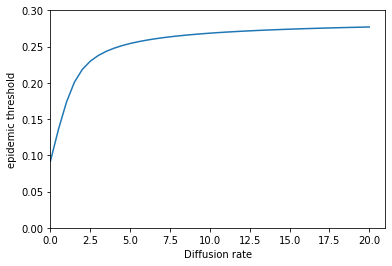

[0.09213833752275288, 0.1355958470318474, 0.1730211208555511, 0.2008037683126014, 0.21853717650065949, 0.22989755255924563, 0.23771663073839647, 0.2434562471046636, 0.2478761984984962, 0.2514029584352456, 0.254294168741412, 0.25671514566442055, 0.2587772249136806, 0.26055838357675043, 0.26211502062596814, 0.2634890369880714, 0.26471227643953965, 0.2658094140025015, 0.26679989389162984, 0.2676992651983925, 0.2685201243449376, 0.2692727939492795, 0.2699658208637774, 0.27060634757375895, 0.27120039325260925, 0.2717530692893604, 0.2722687465674257, 0.27275118672534154, 0.27320364619878124, 0.2736289594488617, 0.2740296061124155, 0.2744077656089475, 0.2747653618698238, 0.27510410023314946, 0.27542549806306604, 0.27573091031792574, 0.27602155101804726, 0.27629851136171624, 0.2765627750980122, 0.2768152316183439, 0.2770566871670349]


In [7]:
xx=np.linspace(0, 20, 41)
yy=[]
for i in xx:
    D_I=i
    MM=((mu+D_I)*np.dot(np.diag(1/k),np.identity(len(G.nodes())))-D_I*A1)*k_mean/rho
    w=LA.eigvals(MM)
    w=w.real
    w.sort()
    yy.append(w[0])

plt.plot(xx, yy)
pyplot.xlim(xmin=0)
pyplot.ylim(ymin=0, ymax=0.3)
plt.xlabel('Diffusion rate')
plt.ylabel('epidemic threshold')
plt.show()
print(yy)